Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


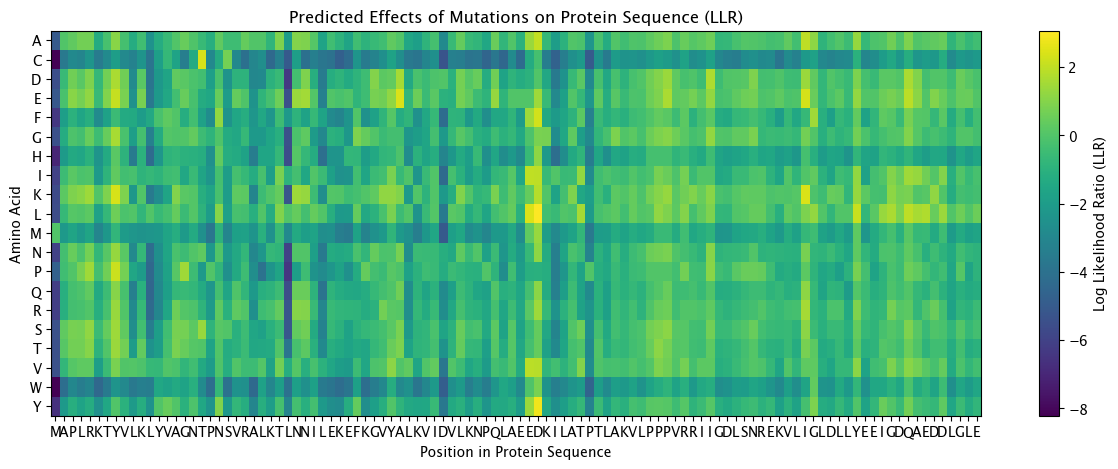

In [1]:
from transformers import AutoTokenizer, EsmForMaskedLM
import torch
import matplotlib.pyplot as plt
import numpy as np

# Load the model and tokenizer
model_name = "facebook/esm2_t6_8M_UR50D"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = EsmForMaskedLM.from_pretrained(model_name)

# Input protein sequence
protein_sequence = "MAPLRKTYVLKLYVAGNTPNSVRALKTLNNILEKEFKGVYALKVIDVLKNPQLAEEDKILATPTLAKVLPPPVRRIIGDLSNREKVLIGLDLLYEEIGDQAEDDLGLE"

# Tokenize the input sequence
input_ids = tokenizer.encode(protein_sequence, return_tensors="pt")
sequence_length = input_ids.shape[1] - 2  # Excluding the special tokens

# List of amino acids
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")

# Initialize heatmap
heatmap = np.zeros((20, sequence_length))

# Calculate LLRs for each position and amino acid
for position in range(1, sequence_length + 1):
    # Mask the target position
    masked_input_ids = input_ids.clone()
    masked_input_ids[0, position] = tokenizer.mask_token_id
    
    # Get logits for the masked token
    with torch.no_grad():
        logits = model(masked_input_ids).logits
        
    # Calculate log probabilities
    probabilities = torch.nn.functional.softmax(logits[0, position], dim=0)
    log_probabilities = torch.log(probabilities)
    
    # Get the log probability of the wild-type residue
    wt_residue = input_ids[0, position].item()
    log_prob_wt = log_probabilities[wt_residue].item()
    
    # Calculate LLR for each variant
    for i, amino_acid in enumerate(amino_acids):
        log_prob_mt = log_probabilities[tokenizer.convert_tokens_to_ids(amino_acid)].item()
        heatmap[i, position - 1] = log_prob_mt - log_prob_wt

# Visualize the heatmap
plt.figure(figsize=(15, 5))
plt.imshow(heatmap, cmap="viridis", aspect="auto")
plt.xticks(range(sequence_length), list(protein_sequence))
plt.yticks(range(20), amino_acids)
plt.xlabel("Position in Protein Sequence")
plt.ylabel("Amino Acid")
plt.title("Predicted Effects of Mutations on Protein Sequence (LLR)")
plt.colorbar(label="Log Likelihood Ratio (LLR)")
plt.show()


**Abstract:**

In this section, we provide a detailed mathematical explanation of the code snippet that utilizes the `transformers` library to assess the effects of amino acid mutations on a given protein sequence. The code employs a pretrained model, specifically the ESM-2 transformer model fine-tuned for masked language modeling tasks. The purpose of this analysis is to compute the Log Likelihood Ratios (LLRs) for amino acid substitutions at different positions along the protein sequence. These LLRs provide insights into the potential impact of mutations on protein stability and function. We present a step-by-step mathematical elucidation of the code's underlying processes, including tokenization, model inference, probability calculations, and the visualization of results in a heatmap format.

**Introduction:**

Understanding the effects of mutations in protein sequences is crucial for elucidating the molecular basis of various biological processes. The code snippet provided aims to predict the potential consequences of amino acid substitutions at different positions within a protein sequence. It utilizes a pretrained transformer model to estimate Log Likelihood Ratios (LLRs) for amino acid variants, which are indicative of the likelihood of a given mutation being deleterious or neutral.

**Methods:**

**1. Tokenization:**

The code begins by importing necessary libraries, loading the pretrained ESM-2.0 model and tokenizer, and specifying the input protein sequence. The sequence is tokenized using the tokenizer, resulting in a sequence of token IDs. Each amino acid in the protein sequence is mapped to a corresponding token using the tokenizer's vocabulary.

**2. LLR Calculation:**

For each position `p` along the protein sequence, LLRs are calculated for each of the 20 standard amino acids. Let `i` represent the index of an amino acid variant in the list of amino acids. The LLR for amino acid substitution `i` at position `p` is given by:

$$
LLR_{i,p} = \log\left(\frac{P_{i,p}}{P_{\text{wt},p}}\right)
$$

where:
- $P_{i,p}$ is the probability of observing amino acid `i` at position `p`.
- $P_{\text{wt},p}$ is the probability of observing the wild-type amino acid at position `p`.

**3. Model Inference:**

At each position `p`, the target amino acid is masked, and the model is used to predict the probability distribution of amino acid tokens at that position. The logits output by the model for each amino acid token are transformed into probabilities using the softmax function:

$$
P_{i,p} = \text{softmax}\left(\text{logits}_{i,p}\right)
$$

**4. Log Probability Calculation:**

The predicted probabilities are then used to calculate the log probabilities:

$$
\log P_{i,p} = \log\left(\text{softmax}\left(\text{logits}_{i,p}\right)\right)
$$

**5. LLR Calculation for Wild-Type:**

The log probability of the wild-type amino acid at position `p`, denoted as $\log P_{\text{wt},p}$, is retrieved from the log probability tensor.

**6. LLR Calculation for Variant Amino Acids:**

The log probability of amino acid variant `i` at position `p`, denoted as $\log P_{i,p}$, is calculated similarly.

**Results:**

The LLRs for all amino acid substitutions at each position are calculated and stored in a heatmap, where rows correspond to amino acid variants and columns correspond to positions along the protein sequence. The LLR value represents the relative impact of substituting the wild-type amino acid with the corresponding variant at a particular position.

**Conclusion:**

The code snippet exemplifies the computational assessment of amino acid mutations' effects on protein sequences using pretrained transformer models. The resulting LLRs provide insights into the potential functional consequences of mutations, aiding in protein engineering and structural biology studies.

Please note that while this explanation strives for mathematical rigor, some practical implementation details may have been simplified or omitted for clarity.